##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [3]:
!wget -q -O rps.zip https://storage.googleapis.com/mediapipe-tasks/gesture_recognizer/rps_data_sample.zip
!unzip -qq rps.zip

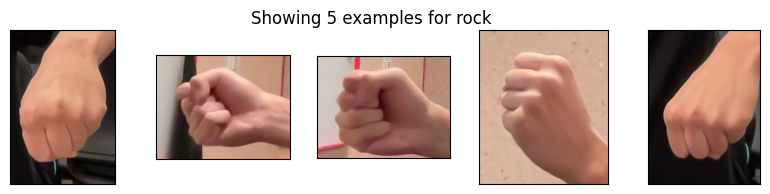

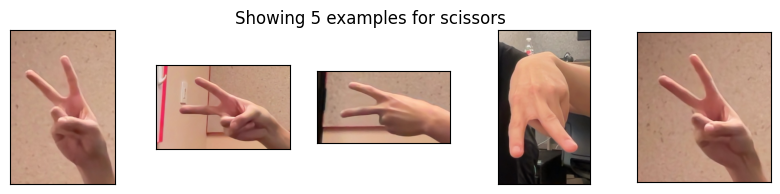

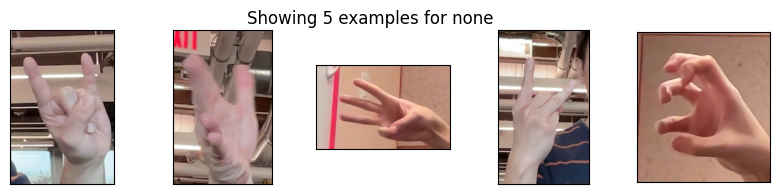

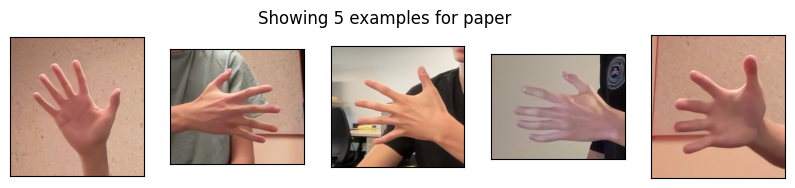

In [5]:
import matplotlib.pyplot as plt
import os

NUM_EXAMPLES = 5
IMAGES_PATH = "rps_data_sample"

# Get the list of labels from the list of folder names.
labels = []
for i in os.listdir(IMAGES_PATH):
  if os.path.isdir(os.path.join(IMAGES_PATH, i)):
    labels.append(i)

# Show the images.
for label in labels:
  label_dir = os.path.join(IMAGES_PATH, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

## Making a New Model



In [6]:
!pip install -q mediapipe-model-maker

  DEPRECATION: Building 'seqeval' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'seqeval'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'promise' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'promise'. Discussion can be found at https://github.com/pypa/pip/issues/6334
ERROR: pip's dependency resolver does not currently take into account all the packag

In [7]:
# Import the necessary modules.
from mediapipe_model_maker import gesture_recognizer

2025-07-23 13:31:57.531729: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-23 13:31:57.654728: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-23 13:31:57.654774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-23 13:31:57.658226: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-23 13:31:57.672658: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-23 13:31:57.673643: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [8]:
# Load the rock-paper-scissor image archive.
data = gesture_recognizer.Dataset.from_folder(
    dirname=IMAGES_PATH,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)

# Split the archive into training, validation and test dataset.
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Loading image /home/user/ModelMaker/rps_data_sample/paper/236.jpg
INFO:tensorflow:Loading image /home/user/ModelMaker/rps_data_sample/scissors/16.jpg
INFO:tensorflow:Loading image /home/user/ModelMaker/rps_data_sample/none/1255.jpg
INFO:tensorflow:Loading image /home/user/ModelMaker/rps_data_sample/none/1048.jpg
INFO:tensorflow:Loading image /home/user/ModelMaker/rps_data_sample/scissors/791.jpg


I0000 00:00:1753291936.197248 3483174 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1753291936.201607 3490969 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) HD Graphics 530 (SKL GT2)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1753291936.270963 3490971 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1753291936.306473 3490977 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1753291936.358540 3490972 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


INFO:tensorflow:Loading image /home/user/ModelMaker/rps_data_sample/scissors/23.jpg
INFO:tensorflow:Loading image /home/user/ModelMaker/rps_data_sample/paper/890.jpg
INFO:tensorflow:Loading image /home/user/ModelMaker/rps_data_sample/rock/687.jpg
INFO:tensorflow:Loading image /home/user/ModelMaker/rps_data_sample/none/1650.jpg
INFO:tensorflow:Loading image /home/user/ModelMaker/rps_data_sample/rock/896.jpg
INFO:tensorflow:Loading image /home/user/ModelMaker/rps_data_sample/rock/449.jpg
INFO:tensorflow:Loading image /home/user/ModelMaker/rps_data_sample/scissors/641.jpg
INFO:tensorflow:Loading image /home/user/ModelMaker/rps_data_sample/paper/504.jpg
INFO:tensorflow:Loading image /home/user/ModelMaker/rps_data_sample/paper/282.jpg
INFO:tensorflow:Loading image /home/user/ModelMaker/rps_data_sample/scissors/57.jpg
INFO:tensorflow:Loading image /home/user/ModelMaker/rps_data_sample/rock/778.jpg
INFO:tensorflow:Loading image /home/user/ModelMaker/rps_data_sample/scissors/397.jpg
INFO:tenso

2025-07-23 13:32:39.279640: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-23 13:32:39.282032: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


INFO:tensorflow:Load valid hands with size: 473, num_label: 4, labels: none,paper,rock,scissors.


INFO:tensorflow:Load valid hands with size: 473, num_label: 4, labels: none,paper,rock,scissors.


In [9]:
# Train the model
hparams = gesture_recognizer.HParams(export_dir="rock_paper_scissors_model")
options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)
model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer  [(None, 128)]             0         
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 custom_gesture_recognizer_  (None, 4)                 516       
 out (Dense)                                                     
                                                             

INFO:tensorflow:Training the models...


Epoch 1/10
189/189 [==============================] - 2s 7ms/step - loss: 0.7869 - categorical_accuracy: 0.3810 - val_loss: 0.4562 - val_categorical_accuracy: 0.6383 - lr: 0.0010
Epoch 2/10
189/189 [==============================] - 1s 5ms/step - loss: 0.5807 - categorical_accuracy: 0.5476 - val_loss: 0.3251 - val_categorical_accuracy: 0.7660 - lr: 9.9000e-04
Epoch 3/10
189/189 [==============================] - 1s 5ms/step - loss: 0.5550 - categorical_accuracy: 0.5714 - val_loss: 0.2808 - val_categorical_accuracy: 0.7234 - lr: 9.8010e-04
Epoch 4/10
189/189 [==============================] - 1s 5ms/step - loss: 0.5104 - categorical_accuracy: 0.6032 - val_loss: 0.2619 - val_categorical_accuracy: 0.7447 - lr: 9.7030e-04
Epoch 5/10
189/189 [==============================] - 1s 6ms/step - loss: 0.5026 - categorical_accuracy: 0.6005 - val_loss: 0.2492 - val_categorical_accuracy: 0.7447 - lr: 9.6060e-04
Epoch 6/10
189/189 [==============================] - 1s 6ms/step - loss: 0.4794 - catego

In [10]:
loss, acc = model.evaluate(test_data, batch_size=1)
print(f"Test loss:{loss}, Test accuracy:{acc}")

48/48 [==============================] - 1s 2ms/step - loss: 0.2560 - categorical_accuracy: 0.7917
Test loss:0.2560396194458008, Test accuracy:0.7916666865348816


In [11]:
# Export the model bundle.
model.export_model()

# Rename the file to be more descriptive.
!mv rock_paper_scissors_model/gesture_recognizer.task rock_paper_scissors.task

Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite
INFO:tensorflow:Assets written to: /tmp/tmptkee30_3/saved_model/assets


INFO:tensorflow:Assets written to: /tmp/tmptkee30_3/saved_model/assets
2025-07-23 13:33:48.971286: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2025-07-23 13:33:48.971324: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2025-07-23 13:33:48.972008: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmptkee30_3/saved_model
2025-07-23 13:33:48.973747: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-07-23 13:33:48.973767: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmptkee30_3/saved_model
2025-07-23 13:33:48.977047: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2025-07-23 13:33:48.977923: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2025-07-23 13:33:49.021655: I tensorflow/cc/saved_model/

In [12]:
from google.colab import files
files.download("rock_paper_scissors.task")

ModuleNotFoundError: No module named 'google.colab'

In [18]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("photo.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

plt.imshow(img)
plt.title("Image")
plt.axis("off")
plt.show()


[ WARN:0@2334.194] global loadsave.cpp:268 findDecoder imread_('photo.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [22]:
# Imports neccessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# Create a GestureRecognizer object.
model_path = os.path.abspath("rock_paper_scissors.task")
recognizer = vision.GestureRecognizer.create_from_model_path(model_path)

# Load the input image.
image = mp.Image.create_from_file('photo.jpg')

# Run gesture recognition.
recognition_result = recognizer.recognize(image)

# Display the most likely gesture.
top_gesture = recognition_result.gestures[0][0]
print(f"Gesture recognized: {top_gesture.category_name} ({top_gesture.score})")

Gesture recognized: paper (0.8663276433944702)


I0000 00:00:1753295210.156469 3483174 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1753295210.159168 3544311 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) HD Graphics 530 (SKL GT2)
W0000 00:00:1753295210.159693 3483174 gesture_recognizer_graph.cc:129] Hand Gesture Recognizer contains CPU only ops. Sets HandGestureRecognizerGraph acceleration to Xnnpack.
W0000 00:00:1753295210.211976 3544313 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1753295210.240355 3544317 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1753295210.242577 3544315 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W